<a href="https://colab.research.google.com/github/Kishore2o/mnist-classification/blob/main/ex%203.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image


In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [7]:
X_train.shape


(60000, 28, 28)

In [8]:
X_test.shape

(10000, 28, 28)

In [9]:
single_image= X_train[0]

In [10]:
single_image.shape

(28, 28)

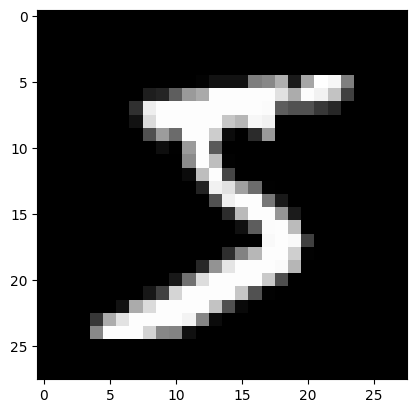

In [11]:
plt.imshow(single_image,cmap='gray')

In [12]:
y_train.shape

(60000,)

In [13]:

X_train.min()


0

In [14]:
X_train.max()

255

In [15]:
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

In [16]:

X_train_scaled.min()

0.0

In [17]:
X_train_scaled.max()

1.0

In [18]:
y_train[0]

5

In [19]:
y_train_onehot = utils.to_categorical(y_train,10)
y_test_onehot = utils.to_categorical(y_test,10)


In [20]:
type(y_train_onehot)

numpy.ndarray

In [21]:

y_train_onehot.shape

(60000, 10)

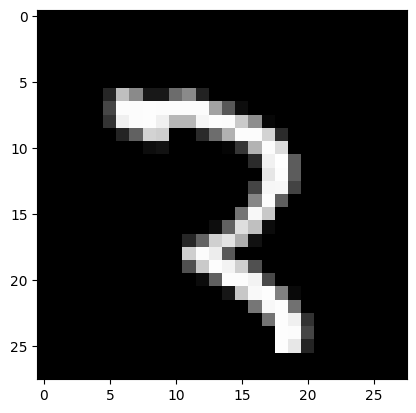

In [22]:

single_image = X_train[500]
plt.imshow(single_image,cmap='gray')

In [23]:
y_train_onehot[500]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [24]:

X_train_scaled = X_train_scaled.reshape(-1,28,28,1)
X_test_scaled = X_test_scaled.reshape(-1,28,28,1)

In [25]:
print("Name : S.Kishore\nregister number : 212222240050")

Name : S.Kishore
register number : 212222240050


In [26]:
model = keras.Sequential()
# Write your code here
model.add(layers.Input(shape=(28,28,1)))
model.add(layers.Conv2D(filters=32,kernel_size=(5,5),strides=(1,1),activation='relu'))
model.add(layers.Conv2D(filters=64,kernel_size=(5,5),strides=(1,1),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(20,activation='relu'))
model.add(layers.Dense(15,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

print(model)


In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 conv2d_1 (Conv2D)           (None, 20, 20, 64)        51264     
                                                                 
 max_pooling2d (MaxPooling2  (None, 10, 10, 64)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 6400)              0         
                                                                 
 dense (Dense)               (None, 20)                128020    
                                                                 
 dense_1 (Dense)             (None, 15)                315       
                                                        

In [28]:

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [29]:
model.fit(X_train_scaled ,y_train_onehot, epochs=4,
          batch_size=64,
          validation_data=(X_test_scaled,y_test_onehot))

Epoch 1/4
938/938 [==============================] - 218s 231ms/step - loss: 0.2307 - accuracy: 0.9304 - val_loss: 0.0662 - val_accuracy: 0.9807
Epoch 2/4
938/938 [==============================] - 207s 220ms/step - loss: 0.0605 - accuracy: 0.9820 - val_loss: 0.0548 - val_accuracy: 0.9837
Epoch 3/4
938/938 [==============================] - 208s 222ms/step - loss: 0.0392 - accuracy: 0.9880 - val_loss: 0.0454 - val_accuracy: 0.9855
Epoch 4/4
938/938 [==============================] - 210s 224ms/step - loss: 0.0304 - accuracy: 0.9908 - val_loss: 0.0372 - val_accuracy: 0.9885


In [30]:
metrics = pd.DataFrame(model.history.history)

In [31]:
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.230708,0.930367,0.066223,0.9807
1,0.060549,0.982033,0.054762,0.9837
2,0.039173,0.988050,0.045425,0.9855
3,0.030410,0.990850,0.037246,0.9885


<Axes: >

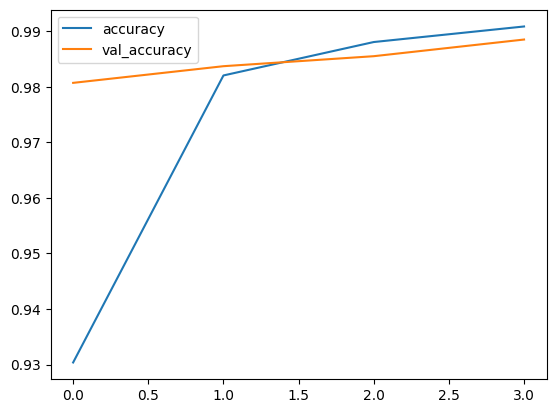

In [32]:
metrics[['accuracy','val_accuracy']].plot()


<Axes: >

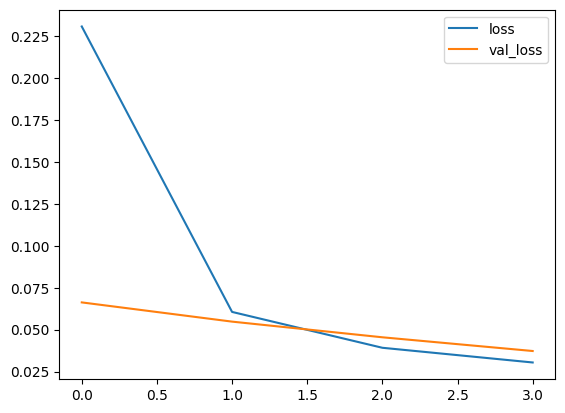

In [33]:
metrics[['loss','val_loss']].plot()

In [34]:

x_test_predictions = np.argmax(model.predict(X_test_scaled), axis=1)

313/313 [==============================] - 24s 76ms/step


In [35]:
print(confusion_matrix(y_test,x_test_predictions))

[[ 977    0    0    0    0    0    2    1    0    0]
 [   0 1132    0    0    1    0    1    1    0    0]
 [   1    1 1024    1    0    0    1    3    1    0]
 [   0    1    1  992    0    9    0    5    2    0]
 [   1    0    0    0  971    0    5    0    1    4]
 [   1    0    1    1    0  887    1    1    0    0]
 [   5    3    0    0    2    2  945    0    1    0]
 [   0    5    4    1    0    0    0 1013    1    4]
 [   6    1    3    0    0    1    0    1  961    1]
 [   0    2    0    0    4    8    0    5    7  983]]


In [36]:
print(classification_report(y_test,x_test_predictions))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       1.00      0.98      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.98      0.99      0.98      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [44]:
img = image.load_img('8.jpg')


type(img)

PIL.JpegImagePlugin.JpegImageFile

In [45]:
img = image.load_img('8.jpg')
img_tensor = tf.convert_to_tensor(np.asarray(img))
img_28 = tf.image.resize(img_tensor,(28,28))
img_28_gray = tf.image.rgb_to_grayscale(img_28)
img_28_gray_scaled = img_28_gray.numpy()/255.0


In [46]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_scaled.reshape(1,28,28,1)),
     axis=1)


1/1 [==============================] - 0s 33ms/step


In [47]:
print(x_single_prediction)

[6]


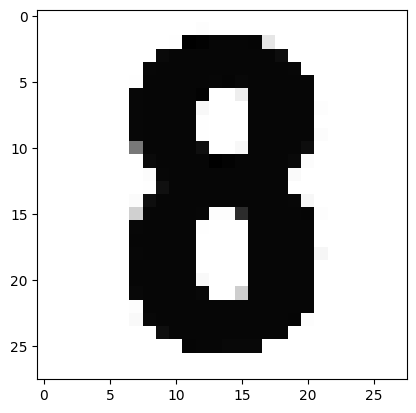

In [48]:
plt.imshow(img_28_gray_scaled.reshape(28,28),cmap='gray')

In [49]:
img_28_gray_inverted = 255.0-img_28_gray
img_28_gray_inverted_scaled = img_28_gray_inverted.numpy()/255.0



x_single_prediction = np.argmax(
    model.predict(img_28_gray_inverted_scaled.reshape(1,28,28,1)),
     axis=1)

1/1 [==============================] - 0s 27ms/step


In [50]:
print(x_single_prediction)

[8]
